## Отчет по оптимизации функции Розенброка

### Задача оптимизации
В данной работе рассматривается задача оптимизации функции Розенброка, которая часто используется в качестве тестовой функции для алгоритмов оптимизации. Функция Розенброка для двух переменных \(x\) и \(y\) определяется следующим образом:

$$
f(x, y) = (1 - x)^2 + 100(y - x^2)^2
$$






Для аналитического нахождения точки минимума функции Билла, заданной формулой:
$$ f(x_1, x_2) = (1.5 - x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2 $$
мы сначала вычислим частные производные по переменным \(x_1\) и \(x_2\), а затем решим систему уравнений, полученную из условий первого порядка (производные равны нулю).

Частные производные функции по переменным $x_1$ и $x_2$ можно выразить следующим образом:
- Производная по \(x_1\):
$$ \frac{\partial f}{\partial x_1} = 2(1.5 - x_1 + x_1x_2)(-1 + x_2) + 2(2.25 - x_1 + x_1x_2^2)(-1 + x_2^2) + 2(2.625 - x_1 + x_1x_2^3)(-1 + x_2^3) $$
- Производная по \(x_2\):
$$ \frac{\partial f}{\partial x_2} = 2(1.5 - x_1 + x_1x_2)x_1 + 2(2.25 - x_1 + x_1x_2^2)2x_1x_2 + 2(2.625 - x_1 + x_1x_2^3)3x_1x_2^2$$

Решение этой системы уравнений даст критические точки функции, среди которых мы ищем точку минимума.

### Подготовка кода для аналитического решения
Для решения этой задачи с использованием библиотеки SymPy в Python, мы сначала определим символьные переменные, затем опишем функцию, вычислим её частные производные и найдем решения системы уравнений. Вот пример соответствующего кода:


*Расчет минимума функции*

In [13]:
import sympy as sp


x, y = sp.symbols('x y')


f = 100 * (y - x**2)**2 + (1 - x)**2

# Вычисление частных производных
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Решение системы уравнений
solutions = sp.solve([df_dx, df_dy], (x, y))
solutions


[(1, 1)]


**Функция Розенброка:**  

$$f(x_1, x_2) = 100 \cdot (x_2 - x_1^2)^2 + (1 - x_1)^2 $$



**Метод наискорейшего спуска:**  
Метод наискорейшего спуска является одним из наиболее простых методов оптимизации. Он заключается в следующем итерационном процессе:
$$\ x_{k+1} = x_k - \alpha_k \cdot \nabla f(x_k) \$$
где $$  \alpha_k $$ - оптимальный шаг, который можно найти, например, методом одномерного поиска.

In [14]:
import numpy as np
from scipy.optimize import minimize_scalar
from autograd import grad
import autograd.numpy as anp

# Функция Розенброка и её градиент с применением autograd
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

grad_rosenbrock = grad(rosenbrock)

# Функция одномерного поиска оптимального шага
def line_search(f, x, direction):
    obj_func = lambda alpha: f(x - alpha * direction)
    result = minimize_scalar(obj_func)
    return result.x

# Метод наискорейшего спуска с логированием
def gradient_descent_with_logging(f, grad_f, x0, epsilon=1e-6, max_iter=20000):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()] 
    f_values = [f(x)]
    
    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < epsilon: 
            print(f"Convergence reached at iteration {i}")
            break
        
        alpha = line_search(f, x, grad)
        x -= alpha * grad
        trajectory.append(x.copy())  
        f_values.append(f(x)) 
    
    return x, f(x), trajectory, f_values  


*Нахождение точки минимума методом наискорейшего спуска*

In [15]:
selected_starting_point = (1.25, -0.45)

final_x, final_f_val, trajectory, f_values = gradient_descent_with_logging(rosenbrock, grad_rosenbrock, selected_starting_point, 1e-6, 20000)


print("First 5 iterations:")
for i, point in enumerate(trajectory[:5]):
    print(f"Iteration {i}: Point = {point}")


print("\nLast 5 iterations:")
for i, point in enumerate(trajectory[-5:], start=len(trajectory) - 5):
    print(f"Iteration {i}: Point = {point}")

print(f"\nMinimum point: {final_x}")


Convergence reached at iteration 601
First 5 iterations:
Iteration 0: Point = [ 1.25 -0.45]
Iteration 1: Point = [0.12161456 0.00113001]
Iteration 2: Point = [0.12941046 0.02062943]
Iteration 3: Point = [0.15272118 0.01130977]
Iteration 4: Point = [0.15997028 0.02944154]

Last 5 iterations:
Iteration 597: Point = [0.99999877 0.99999754]
Iteration 598: Point = [0.99999883 0.99999769]
Iteration 599: Point = [0.99999884 0.99999768]
Iteration 600: Point = [0.9999989  0.99999782]
Iteration 601: Point = [0.99999891 0.99999781]

Minimum point: [0.99999891 0.99999781]



#### Визуализация функции
Сначала был построен график поверхности и контурный график функции Розенброка, что позволило визуально оценить форму функции и её особенности, такие как глубокая, узкая долина, ведущая к глобальному минимуму.

Сразу на контурном графике можно видеть глобальный минимум и траекторию движения к нему с помощью метода наискорейшего спуска

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def plot_surface_and_contour(trajectory=None):
   
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    
    Z = rosenbrock(np.array([X.ravel(), Y.ravel()])).reshape(X.shape)
    
    fig = plt.figure(figsize=(14, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=False, alpha=0.8)
    
    # Глобальный минимум
    ax1.scatter(1, 1, rosenbrock([1, 1]), color='blue', s=100)

    if trajectory is not None and len(trajectory) > 0:
        trajectory = np.array(trajectory)
        z_trajectory = rosenbrock(trajectory.T)
        ax1.plot(trajectory[:, 0], trajectory[:, 1], z_trajectory, color='b', marker='.', markersize=7)

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X, Y)')
    ax1.set_title('Rosenbrock Function Surface')

    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap=cm.viridis)

    # Глобальный минимум
    ax2.plot(1, 1, 'bo', markersize=10)

    if trajectory is not None and len(trajectory) > 0:
        ax2.plot(trajectory[:, 0], trajectory[:, 1], color='r', marker='.')
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Contour Plot with Gradient Descent Path')

    plt.colorbar(surf, shrink=0.5, aspect=5, ax=ax1)
    plt.colorbar(contour, shrink=0.5, aspect=5, ax=ax2)
    plt.show()

def interactive_plot(start_x=1.25, start_y=-0.45):
    # Начальная точка для градиентного спуска
    starting_point = np.array([start_x, start_y])
    
    # Запуск градиентного спуска и получение результатов
    final_x, final_f_val, trajectory, f_values = gradient_descent_with_logging(rosenbrock, grad_rosenbrock, starting_point, 1e-6, 20000)
    
    
    plot_surface_and_contour(trajectory)

start_x_slider = widgets.FloatSlider(value=-1.5, min=-2.0, max=2.0, step=0.05, description='Start X:')
start_y_slider = widgets.FloatSlider(value=1.5, min=-1.0, max=3.0, step=0.05, description='Start Y:')


widgets.interactive(interactive_plot, start_x=1.25, start_y=-0.45)


interactive(children=(FloatSlider(value=1.25, description='start_x', max=3.75, min=-1.25), FloatSlider(value=-…

*Визуализация количества итераций для сходимости алгоритма*

На данном графике можно увидеть прекрасную сходисть метода

Convergence reached at iteration 601


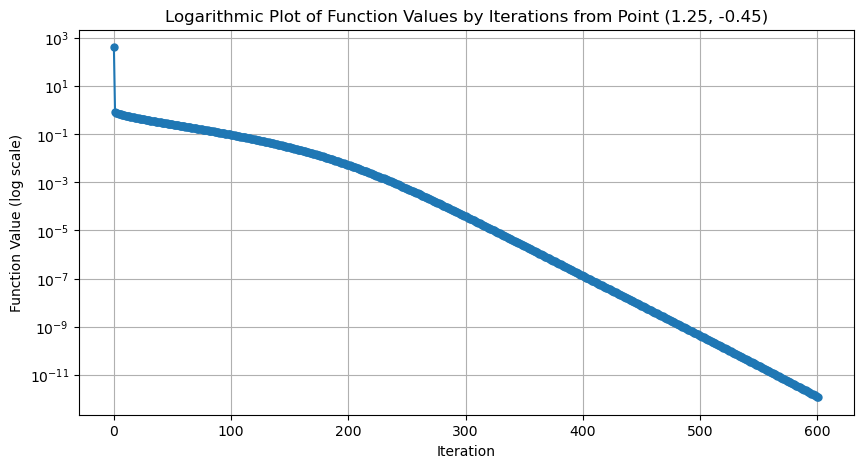

In [17]:
selected_starting_point = (1.25, -0.45)

_, _, _, f_values = gradient_descent_with_logging(rosenbrock, grad_rosenbrock, selected_starting_point)


plt.figure(figsize=(10, 5))
plt.semilogy(f_values, marker='o', linestyle='-', markersize=5) 
plt.xlabel('Iteration')
plt.ylabel('Function Value (log scale)')
plt.title(f'Logarithmic Plot of Function Values by Iterations from Point {selected_starting_point}')
plt.grid(True)
plt.show()


# Дополнительно

Было проведено сравнение трех методов:


**Nesterov Accelerated Gradient (NAG):**  
Метод Nesterov Accelerated Gradient (NAG) является адаптивным методом оптимизации, который модифицирует обычный градиентный спуск для улучшения сходимости. Формула обновления выглядит следующим образом:
$$ v_{k+1} = \beta \cdot v_k + \alpha \cdot \nabla f(x_k - \beta \cdot v_k) $$
$$ x_{k+1} = x_k - v_{k+1} $$
где $$  \alpha  - скорость  обучения,   \beta  - параметр инерции.$$ 

**Heavy-ball:**  
Метод Heavy-ball также является адаптивным методом оптимизации, который вводит инерцию в обычный градиентный спуск. Формулы обновления выглядят следующим образом:
$$ v_{k+1} = \beta \cdot v_k - \alpha \cdot \nabla f(x_k) $$
$$ x_{k+1} = x_k + v_{k+1} $$

**Adam:**  
Метод Adam - это метод оптимизации, который объединяет в себе идеи NAG и Heavy-ball, а также добавляет адаптивное масштабирование скорости обучения. Формулы обновления выглядят следующим образом:
$$ m_{k+1} = \beta_1 \cdot m_k + (1 - \beta_1) \cdot \nabla f(x_k) $$
$$ v_{k+1} = \beta_2 \cdot v_k + (1 - \beta_2) \cdot (\nabla f(x_k))^2 $$
$$ \hat{m}_{k+1} = \frac{m_{k+1}}{1 - \beta_1^{k+1}} $$
$$ \hat{v}_{k+1} = \frac{v_{k+1}}{1 - \beta_2^{k+1}} $$
$$ x_{k+1} = x_k - \frac{\alpha \cdot \hat{m}_{k+1}}{\sqrt{\hat{v}_{k+1}} + \epsilon} $$
где $$  \alpha\ - скорость обучения, \beta_1  и \beta_2  - параметры инерции,  \epsilon - малое число для численной стабильности.$$ 



NAG converged at iteration 3020
Heavy-ball converged at iteration 3024
Adam converged at iteration 15153


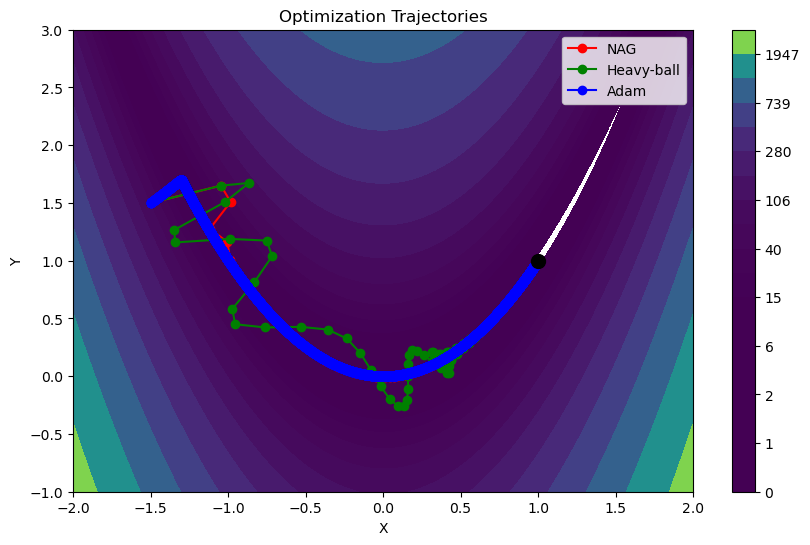

In [18]:

# Nesterov Accelerated Gradient (NAG)
def nag_optimizer(f, grad_f, x0, lr=0.001, momentum=0.9, epsilon=1e-6, max_iter=20000):
    x = np.array(x0, dtype=float)
    v = np.zeros_like(x)
    trajectory = [x.copy()]
    for i in range(max_iter):
        grad = grad_f(x - momentum * v)
        v = momentum * v + lr * grad
        x -= v
        trajectory.append(x.copy())
        if np.linalg.norm(grad) < epsilon:
            print(f"NAG converged at iteration {i}")
            break
    return x, f(x), trajectory

# Heavy-ball
def heavy_ball_optimizer(f, grad_f, x0, lr=0.001, momentum=0.9, epsilon=1e-6, max_iter=20000):
    x = np.array(x0, dtype=float)
    v = np.zeros_like(x)
    trajectory = [x.copy()]
    for i in range(max_iter):
        grad = grad_f(x)
        v = momentum * v - lr * grad
        x += v
        trajectory.append(x.copy())
        if np.linalg.norm(grad) < epsilon:
            print(f"Heavy-ball converged at iteration {i}")
            break
    return x, f(x), trajectory

# Adam
def adam_optimizer(f, grad_f, x0, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=20000):
    x = np.array(x0, dtype=float)
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    trajectory = [x.copy()]
    for i in range(1, max_iter + 1):
        grad = grad_f(x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**i)
        v_hat = v / (1 - beta2**i)
        x -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        trajectory.append(x.copy())
        if np.linalg.norm(grad) < epsilon:
            print(f"Adam converged at iteration {i}")
            break
    return x, f(x), trajectory


def visualize_optimizers():
    starting_point = np.array([-1.5, 1.5])

    nag_result, _, nag_trajectory = nag_optimizer(rosenbrock, grad_rosenbrock, starting_point)
    heavy_ball_result, _, heavy_ball_trajectory = heavy_ball_optimizer(rosenbrock, grad_rosenbrock, starting_point)
    adam_result, _, adam_trajectory = adam_optimizer(rosenbrock, grad_rosenbrock, starting_point)

    plt.figure(figsize=(10, 6))
    plt.contourf(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap=plt.cm.viridis)
    plt.colorbar()
    
    nag_trajectory = np.array(nag_trajectory)
    heavy_ball_trajectory = np.array(heavy_ball_trajectory)
    adam_trajectory = np.array(adam_trajectory)

    plt.plot(nag_trajectory[:, 0], nag_trajectory[:, 1], '-o', label='NAG', color='r')
    plt.plot(heavy_ball_trajectory[:, 0], heavy_ball_trajectory[:, 1], '-o', label='Heavy-ball', color='g')
    plt.plot(adam_trajectory[:, 0], adam_trajectory[:, 1], '-o', label='Adam', color='b')

    # Глобальный минимум
    plt.plot(1, 1, 'ko', markersize=10)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Optimization Trajectories')
    plt.legend()
    plt.show()


x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(np.array([X.ravel(), Y.ravel()])).reshape(X.shape)


visualize_optimizers()


Из полученных результатов видно, что алгоритмы наискорейшего спуска, NAG, Heavy-ball и Adam сошлись к минимуму функции Розенброка. Выводы по результатам каждого метода:

1. **Наискорейший спуск:**  
   Алгоритм наискорейшего спуска сходится к минимуму за 601 итерацию.

2. **Nesterov Accelerated Gradient (NAG):**  
   Метод NAG сходится к минимуму за 3020 итераций.

3. **Heavy-ball:**  
   Метод Heavy-ball сходится к минимуму за 3024 итерации.

4. **Adam:**  
   Метод Adam сходится к минимуму за 15153 итерации.

Из полученных результатов можно сделать следующие выводы:

- Все рассмотренные методы сошлись к минимуму функции Розенброка.
- Методы NAG и Heavy-ball сходятся к минимуму более быстро по сравнению с наискорейшим спуском.
- Метод Adam требует большего количества итераций для сходимости по сравнению с другими методами.

Графическое представление траекторий движения к экстремуму также подтверждает сходимость всех алгоритмов к глобальному минимуму функции Розенброка.